In [95]:
import pandas as pd

In [96]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [97]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [98]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,jsc1399_2013_09_11_151245_ccs,48.392525,1.449455,10.807570,9.412217,6.966517,9.737338,2.415901,0.546830,jsc1399
1,r65_2013_11_05_151321_ccs,60.295953,0.644330,20.922156,10.984268,5.362318,4.905437,1.895921,0.952809,r65
2,vzo106_2013_09_03_181628_ccs,66.140995,0.577755,9.105791,8.174664,-0.928668,1.675042,1.174191,2.787567,vzo106
3,201424_2013_11_06_155255_ccs,64.128014,1.422751,10.146329,4.008404,3.469814,0.651467,1.792962,3.886900,201424
4,jsc1424_2013_09_16_145015_ccs,59.121198,1.182303,13.130622,14.252079,3.201447,4.650161,3.591981,0.797406,jsc1424


In [99]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [100]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [101]:
aligned_pred_ICA, aligned_pred_PLS_SM = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [102]:
aligned_pred_PLS_SM

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
ID,,,,,,,,,
g24mt_2013_10_09_160456_ccs,61.332813,1.486234,17.377193,8.249104,1.902888,0.490546,2.989499,3.464173,g24mt
gbw07216a_2013_08_07_155234_ccs,14.810418,0.662260,0.457218,6.966719,16.158738,23.037383,0.197574,-0.933360,gbw07216a
201427_2013_11_06_163042_ccs,48.740354,1.924602,19.518113,10.516996,2.612920,8.076435,2.445892,1.989728,201427
pl1b_2013_10_29_155444_ccs,60.775962,0.815754,17.312979,1.361141,1.532363,-0.669145,0.374682,3.453010,pl1b
mnk_2013_10_25_153003_ccs,60.431725,0.652088,15.409324,4.871400,3.152725,6.181392,0.994005,1.347760,mnk
...,...,...,...,...,...,...,...,...,...
pg2_2013_10_28_185928_ccs,67.682740,0.726888,17.221086,1.675706,2.185647,-0.674229,1.106253,4.309914,pg2
lp28_2013_10_23_154612_ccs,56.604676,1.263516,11.067746,12.310775,1.244736,-0.063886,1.297222,2.305981,lp28
guwgna_2013_08_08_152732_ccs,63.258510,0.246739,13.604450,7.401415,2.219366,-2.928360,1.315767,2.173647,guwgna


In [103]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [104]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,66.898180,1.467850,17.677633,8.533144,2.192646,0.461948,2.861214,2.958006,g24mt,g24mt_2013_10_09_160456_ccs
1,-2.303246,-0.253212,0.503388,2.938216,16.941000,29.782996,0.000329,-1.078094,gbw07216a,gbw07216a_2013_08_07_155234_ccs
2,58.435117,1.771017,20.451210,12.441787,2.619470,5.465578,2.480367,2.290248,201427,201427_2013_11_06_163042_ccs
3,67.375762,0.634782,18.705799,1.239222,1.504845,-0.208761,0.377455,2.731356,pl1b,pl1b_2013_10_29_155444_ccs
4,72.800304,-0.416746,13.343860,0.460042,2.287636,2.418919,-0.103718,0.159310,mnk,mnk_2013_10_25_153003_ccs
...,...,...,...,...,...,...,...,...,...,...
66,70.255118,0.710861,18.525062,1.174682,2.575230,-0.152819,0.648872,4.536886,pg2,pg2_2013_10_28_185928_ccs
67,33.467326,1.529958,16.317334,2.379713,2.036228,-0.278809,-0.082846,-2.024388,lp28,lp28_2013_10_23_154612_ccs
68,79.048898,0.578964,13.408533,3.172706,1.405448,-1.219875,-0.268408,4.222794,guwgna,guwgna_2013_08_08_152732_ccs
69,63.494940,0.640128,19.248556,3.624559,3.367584,2.551728,4.342381,2.286323,130,130_2013_10_01_140915_ccs


In [105]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [106]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [107]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_moc_actual_df = merge_with_actual_data(moc_predictions)
moc_rmse_values = calculate_rmse(merged_moc_actual_df)

In [108]:
SiO2_eval_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_moc_actual_df[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

SiO2_eval_df = SiO2_eval_df[0:5]
SiO2_eval_df

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,72.463547,61.332813,g24mt,59.73,66.898180
1,-19.416910,14.810418,gbw07216a,0.05,-2.303246
2,68.129880,48.740354,201427,50.55,58.435117
3,73.975562,60.775962,pl1b,63.51,67.375762
4,85.168882,60.431725,mnk,84.9,72.800304


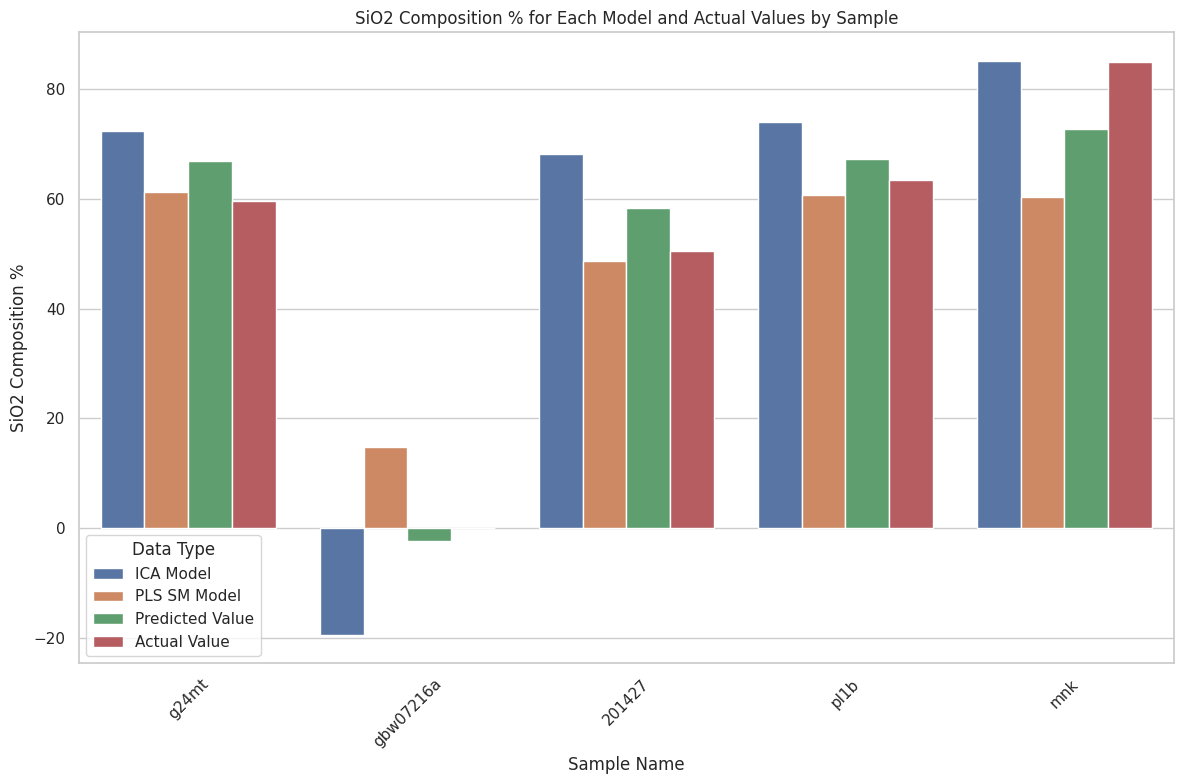

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure for the plot
plt.figure(figsize=(12, 8))

# Creating aliases for the value_vars
aliases = {
    'SiO2_ICA': 'ICA Model',
    'SiO2_PLS_SM': 'PLS SM Model',
    'SiO2_pred': 'Predicted Value',
    'SiO2_actual': 'Actual Value'
}

# Merging the data for actual and predicted values for the plot
melted_data = pd.melt(SiO2_eval_df, id_vars='Sample Name', value_vars=list(aliases.keys()))

# Renaming the columns based on aliases
melted_data = melted_data.rename(columns={'variable': 'Model/Value', 'value': 'SiO2 Composition %'})
melted_data['Model/Value'] = melted_data['Model/Value'].map(aliases)

# Creating the grouped bar chart
sns.barplot(x='Sample Name', y='SiO2 Composition %', hue='Model/Value', data=melted_data)

# Adding labels and title
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Composition %')
plt.title('SiO2 Composition % for Each Model and Actual Values by Sample')
plt.xticks(rotation=45)
plt.legend(title='Data Type')

plt.gca().invert_yaxis()

# Displaying the plot
plt.tight_layout()
plt.show()

In [110]:
merged_moc_actual_df

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,66.898180,59.73,1.467850,0.72,17.677633,16.95,8.533144,8.39,2.192646,3.07,0.461948,0.96,2.861214,2.34,2.958006,3.82,g24mt
1,-2.303246,0.05,-0.253212,0,0.503388,0.24,2.938216,0.45,16.941000,17.88,29.782996,35.02,0.000329,0.01,-1.078094,0,gbw07216a
2,58.435117,50.55,1.771017,2.17,20.451210,28.13,12.441787,10.03,2.619470,3.19,5.465578,2.02,2.480367,2.19,2.290248,1.38,201427
3,67.375762,63.51,0.634782,0.73,18.705799,18.76,1.239222,4.71,1.504845,1.53,-0.208761,0.37,0.377455,0.17,2.731356,4.09,pl1b
4,72.800304,84.9,-0.416746,0.03,13.343860,11.60,0.460042,1.08,2.287636,2.1,2.418919,0.02,-0.103718,0.15,0.159310,0.02,mnk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,70.255118,56.97,0.710861,0.46,18.525062,25.58,1.174682,3.83,2.575230,2.71,-0.152819,0.01,0.648872,0.4,4.536886,5.08,pg2
67,33.467326,56.5,1.529958,1.6,16.317334,14.00,2.379713,12.96,2.036228,5.74,-0.278809,4.40,-0.082846,1.49,-2.024388,0.94,lp28
68,79.048898,71.47,0.578964,0.02,13.408533,14.70,3.172706,5.33,1.405448,0.03,-1.219875,0.62,-0.268408,0.08,4.222794,2.63,guwgna
69,63.494940,57.9,0.640128,0.65,19.248556,16.60,3.624559,7.22,3.367584,3.81,2.551728,4.52,4.342381,4.61,2.286323,1.33,130


In [111]:
moc_rmse_values

{'SiO2': 6.973318072988288,
 'TiO2': 0.527186917154024,
 'Al2O3': 3.6685345446092197,
 'FeOT': 3.456051686070328,
 'MgO': 1.7566679792012654,
 'CaO': 5.75087217745114,
 'Na2O': 2.382306610288962,
 'K2O': 0.9186420817981059}

In [112]:
ICA_actual_merged_df = merge_with_actual_data(aligned_pred_ICA)
ICA_rmses = calculate_rmse(ICA_actual_merged_df)

PLS_SM_actual_merged_df = merge_with_actual_data(aligned_pred_PLS_SM)
PLS_SM_rmses = calculate_rmse(PLS_SM_actual_merged_df)

ICA_rmses

{'SiO2': 11.890854647502254,
 'TiO2': 0.7467450045586231,
 'Al2O3': 4.015700278559288,
 'FeOT': 7.5418471368166315,
 'MgO': 1.2589722285782239,
 'CaO': 11.546638923793363,
 'Na2O': 2.0677297039755147,
 'K2O': 1.0503659297354737}

In [113]:
RMSEs_df = pd.DataFrame([ICA_rmses, PLS_SM_rmses, moc_rmse_values], index=["ICA", "PLS_SM", "MOC"])

In [114]:
RMSEs_df.T

,ICA,PLS_SM,MOC
SiO2,11.890855,9.890796,6.973318
TiO2,0.746745,0.559815,0.527187
Al2O3,4.015700,4.250963,3.668535
FeOT,7.541847,3.749057,3.456052
MgO,1.258972,3.131660,1.756668
CaO,11.546639,3.587836,5.750872
Na2O,2.067730,3.021115,2.382307
K2O,1.050366,1.404673,0.918642
